<a href="https://colab.research.google.com/github/wallacecarlis/data_science/blob/main/PROJETO_800_CLASSIFICACAO_DE_VINHOS_PYCARET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

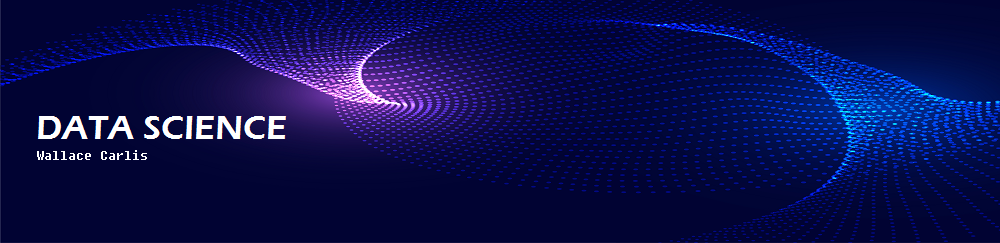

# **Projeto 8 - Classificação de Vinhos - Pycaret**

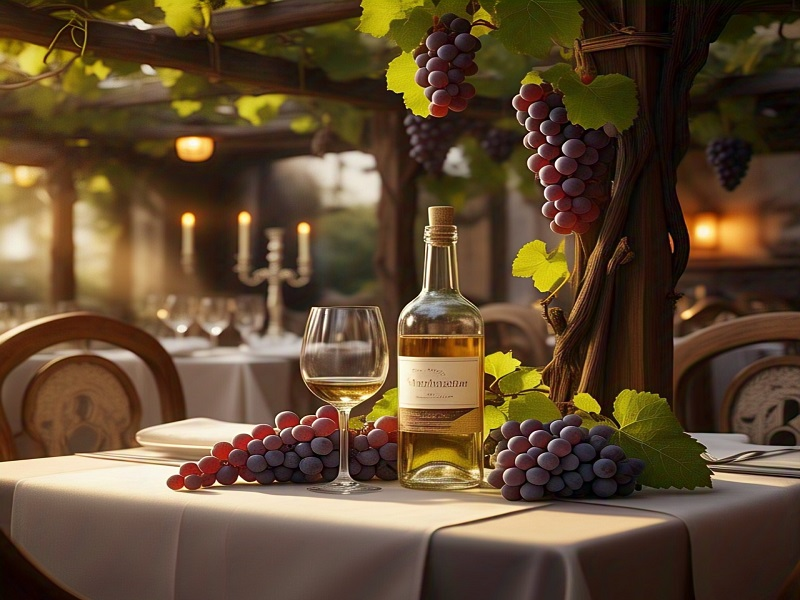

# Contexto sobre tipos de vinhos

#### O **vinho** é uma bebida milenar apreciada em diversas culturas ao longo da história, não apenas pelo seu sabor e valor social, mas também por seus potenciais benefícios à saúde quando consumido com moderação. Rico em **antioxidantes, como o resveratrol e os flavonoides**, especialmente no vinho tinto, ele pode contribuir para a **saúde cardiovascular** ao melhorar a **circulação sanguínea** e reduzir o risco de **doenças do coração**. Além disso, estudos apontam que o consumo moderado de vinho pode ajudar a regular os **níveis de colesterol**, proteger contra o declínio cognitivo relacionado à idade e até **fortalecer o sistema imunológico**. Contudo, é essencial lembrar que esses benefícios estão associados a uma ingestão moderada — cerca de uma taça por dia — e que o **consumo excessivo traz sérios riscos à saúde**.

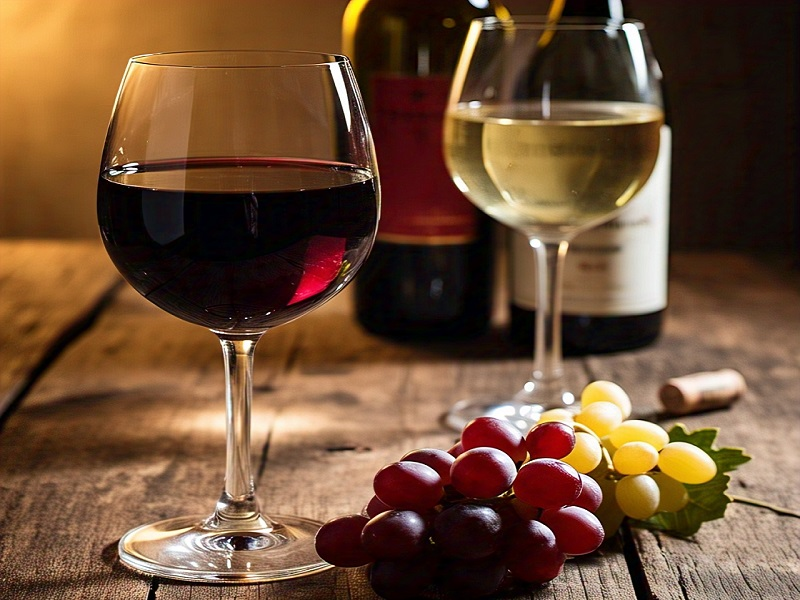

#### Diante disso, para este projeto utilizaremos a biblioteca **pycaret** e seu conceito de **auto-ml**, ou, **auto machine learning** para analisar uma **base de dados de vinhos** disponível dentro da própria biblioteca, onde realizaremos uma **classificação** a partir de seus atributos cujo objetivo será **identificar o tipo de vinho, se tinto ou branco**. A biblioteca tem como principal objetivo melhorar a velocidade na relação **hipótese/insights**, uma vez que conta com diversos **algoritmos** em seu empacotamento, e seu eficaz método de **pipeline**. Iniciaremos com sua instalação e a rotina normal de **EAD** da base de dados.

In [24]:
# 1 - Instalando pycaret
!pip install pycaret -q

#### Após a instalação é recomendado **reiniciar** a **sessão** do notebook. Para isso podemos clicar em:
- Ambiente de execução;
- Reiniciar sessão.
- Em seguida, basta clicar na **próxima célula** abaixo.

#### Sobre a biblioteca, ela possui diversos **datasets** que podem ser acessados na sua **[página oficial](https://pycaret.gitbook.io/docs)**. Vamos utilizar o dataset de **wine** que traz diversos dados sobre **tipos de vinho - tinho ou branco**.

In [25]:
# 2 - Importando as bibliotecas
from pycaret.datasets import get_data
from pycaret.classification import setup, compare_models, models, create_model, predict_model
from pycaret.classification import tune_model, plot_model, evaluate_model, finalize_model
from pycaret.classification import save_model, load_model, pull

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = "svg"
plt.rcParams["font.family"] = "sans-serif"

In [26]:
# 3 - Acessando e visualizando a base de dados
wine = get_data("wine")
print(wine.shape)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


(6497, 13)


#### Dicionário de dados: podemos verificar o **significado de cada coluna** para obtermos uma melhor compreensão dos atributos.

- **Fixed Acidity (Acidez Fixa)**

Ácidos não voláteis presentes no vinho (principalmente ácido tartárico).
Medido em g/dm³.
**Ácidos fixos afetam o sabor e a estrutura do vinho**;


- **Volatile Acidity (Acidez Volátil)**

Ácidos que evaporam facilmente, como ácido acético.
Medido em g/dm³.
**Valores altos podem indicar defeito no vinho, pois geram gosto avinagrado**;

- **Citric Acid (Ácido Cítrico)**

Naturalmente presente nas uvas e usado para dar frescor ao vinho.
Medido em g/dm³.
**Contribui para acidez e ajuda na preservação do vinho**;

- **Residual Sugar (Açúcar Residual)**

Açúcares que não foram fermentados.
Medido em g/dm³.
**Vinhos secos possuem menos de 4 g/L; vinhos doces possuem valores altos**;

- **Chlorides (Cloretos)**

Indica a quantidade de sal no vinho.
Medido em g/dm³.
**Altos níveis podem deixar o vinho com gosto salgado e desagradável**;

- **Free Sulfur Dioxide (Dióxido de Enxofre Livre)**

SO₂ não ligado a outros compostos, responsável pela proteção do vinho contra oxidação e bactérias.
Medido em mg/L.
**Valores baixos podem indicar menor proteção contra deterioração**;

- **Total Sulfur Dioxide (Dióxido de Enxofre Total)**

Soma do SO₂ livre + SO₂ combinado (com taninos e açúcares).
Medido em mg/L.
**Valores altos podem gerar aromas desagradáveis e causar sensibilidade em algumas pessoas**;

- **Density (Densidade)**

Massa do vinho por volume (g/cm³).
Relacionada ao teor alcoólico e concentração de açúcar.
**Vinhos secos geralmente têm densidade próxima da água (1.000 g/cm³)**;

- **pH**

Medida de acidez ou alcalinidade do vinho.
Normalmente varia entre 3.0 e 4.0.
**pH mais baixo (≤ 3.2) → vinho mais ácido e fresco.
pH mais alto (≥ 3.5) → vinho mais macio, mas menos estável microbiologicamente**;

- **Sulphates (Sulfatos)**

Sal do ácido sulfúrico, pode atuar como conservante.
Medido em g/dm³.
**Contribui para a sensação de corpo e estrutura do vinho**;

- **Alcohol (Álcool)**

Teor alcoólico do vinho, **expresso em % vol.
Impacta diretamente sabor, corpo e qualidade geral do vinho**;

- **Quality (Qualidade - variável alvo)**

Nota do vinho, baseada em testes sensoriais feitos por especialistas.
**Escala de 0 a 10, mas os valores mais comuns são entre 3 e 8.
Pode ser usada para regressão (previsão de qualidade) ou classificação (bom/ruim)**.

- **Type (vinho branco ou vermelho)**.

#### Por uma questão de correta utilização de nomenclatura, vamos atualizar o nome da coluna **type** para **wine_type**. Além disso, vamos utilizar o método **describe** para visualizar as principais informações **estatísticas** das colunas **numéricas**.

In [27]:
# 4 - Renomeando a coluna type e verificando o resumo estatístico
wine.rename(columns = {"type" : "wine_type"}, inplace = True)
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


#### Podemos visualizar a **quantidade de amostra por tipo de vinho**, e a partir disso, criar uma base de dados para cada **tipo de vinho**, tinho e branco: **red** e **white**.

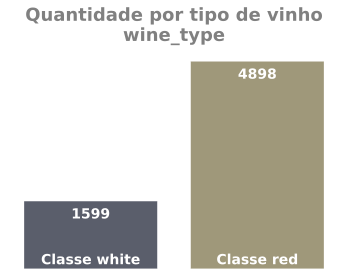

In [28]:
# 5 - Confirmando a quantidade de cada valor na coluna Wine Type
sns.set_style("dark")
fig, ax = plt.subplots(figsize = (5, 4))
barras = sns.countplot(x = "wine_type", data = wine, ax = ax,
                       palette = "cividis", hue = "wine_type", legend = False)

ax.set_title("Quantidade por tipo de vinho\nwine_type", color = "grey",
             fontsize = 18, fontweight = "bold", pad = 10)

for i in barras.patches:
  ax.annotate(int(i.get_height()),
              xy = (i.get_x() + (i.get_width() / 2),
                    i.get_height() - (i.get_width() * 200)),
                    color = "white", fontweight = "bold",
                    ha = "center", va = "top",
                    fontsize = 14)

for i, (nome, valor) in enumerate(zip(wine.wine_type.value_counts().index,
                                      wine.wine_type.value_counts().values)):
  ax.text(i, valor - valor + 200, f"Classe {nome}", ha = "center", color = "white",
          fontsize = 14, fontweight = "bold", va = "center")

ax.axis("off")
plt.tight_layout()

In [29]:
# 6 - Criando bases de dados de acordo com o tipo do vinho
red = wine[wine.wine_type == "red"]
white = wine[wine.wine_type == "white"]

#### Uma vez que temos as bases definidas, podemos verificar as distribuições de algumas colunas interessantes, como **alcohol, residual sugar e ph**. Faremos isso em ambas as bases, tanto com o **histplot** quanto com o **boxplot**. Iniciaremos com a base **red**.

#### Histplot (Alcohol)

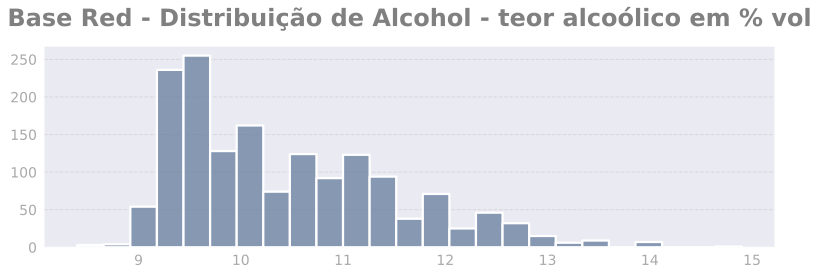

In [30]:
# 7 - Visualização da distribuição da coluna alcohol na base red com histplot
sns.set_style("dark")
fig, ax = plt.subplots(figsize = (11, 4))
bins = 25
ax = sns.histplot(red.alcohol, lw = 5, bins = bins, color = "#657c9e")
ax.set_title("Base Red - Distribuição de Alcohol - teor alcoólico em % vol", fontsize = 24,
             color = "grey", fontweight = "semibold", pad = 20)
ax.tick_params(axis = "x", labelsize = 14, colors = "darkgrey")
ax.tick_params(axis = "y", labelsize = 14, colors = "darkgrey")
ax.set_xlabel("")
ax.set_ylabel("")
ax.grid(True, axis = "y", linestyle = "--", color = "darkgrey", alpha = 0.3)
plt.tight_layout()

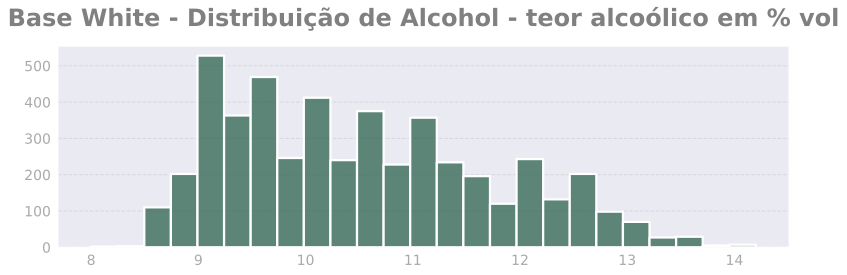

In [31]:
# 8 - Visualização da distribuição da coluna alcohol na base white com histplot
sns.set_style("dark")
fig, ax = plt.subplots(figsize = (11, 4))
bins = 25
ax = sns.histplot(white.alcohol, lw = 5, bins = bins, color = "#2d634f")
ax.set_title("Base White - Distribuição de Alcohol - teor alcoólico em % vol", fontsize = 24,
             color = "grey", fontweight = "semibold", pad = 20)
ax.tick_params(axis = "x", labelsize = 14, colors = "darkgrey")
ax.tick_params(axis = "y", labelsize = 14, colors = "darkgrey")
ax.set_xlabel("")
ax.set_ylabel("")
ax.grid(True, axis = "y", linestyle = "--", color = "darkgrey", alpha = 0.3)
plt.tight_layout()

#### Olhando para as duas distribuições acima, percebe-se que o **teor alcoólico da base red** se concentra significativamente entre **9 e 10%**, com grande destaque para a faixa de **9%**, uma boa quantidade entre **10 e 12%**, e valores indo até **15%**.
#### Já para a base **white** a grande concentração fica entre **9 e 11%**, uma boa quantidade entre **antes de 9% e pouco depois de 12%, indo até perto de **14%**.

#### Histplot (Residual Sugar) - Vinhos **secos possuem menos de 4 g/L**; vinhos **doces possuem valores altos**.

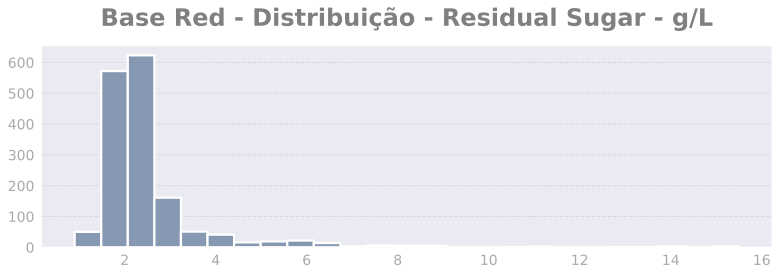

In [32]:
# 9 - Visualização da distribuição da coluna residual sugar na base red com histplot
sns.set_style("dark")
fig, ax = plt.subplots(figsize = (11, 4))
bins = 25
ax = sns.histplot(red["residual sugar"], lw = 5, bins = bins, color = "#657c9e")
ax.set_title("Base Red - Distribuição - Residual Sugar - g/L", fontsize = 24,
             color = "grey", fontweight = "semibold", pad = 20)
ax.tick_params(axis = "x", labelsize = 14, colors = "darkgrey")
ax.tick_params(axis = "y", labelsize = 14, colors = "darkgrey")
ax.set_xlabel("")
ax.set_ylabel("")
ax.grid(True, axis = "y", linestyle = "--", color = "darkgrey", alpha = 0.3)
plt.tight_layout()

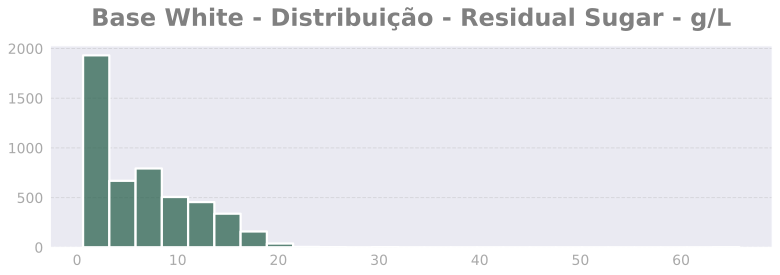

In [33]:
# 10 - Visualização da distribuição da coluna residual sugar na base white com histplot
sns.set_style("dark")
fig, ax = plt.subplots(figsize = (11, 4))
bins = 25
ax = sns.histplot(white["residual sugar"], lw = 5, bins = bins, color = "#2d634f")
ax.set_title("Base White - Distribuição - Residual Sugar - g/L", fontsize = 24,
             color = "grey", fontweight = "semibold", pad = 20)
ax.tick_params(axis = "x", labelsize = 14, colors = "darkgrey")
ax.tick_params(axis = "y", labelsize = 14, colors = "darkgrey")
ax.set_xlabel("")
ax.set_ylabel("")
ax.grid(True, axis = "y", linestyle = "--", color = "darkgrey", alpha = 0.3)
plt.tight_layout()

#### Pelas próprias visualizações percebe-se nitidamente que os vinhos **tintos** são **secos** em sua maioria, e que os vinhos **brancos** são tanto **secos** quanto **adocicados**, dada sua distribuição com valores mais altos.

#### Boxplot (PH)  - Medida de **acidez ou alcalinidade** do vinho. Normalmente varia entre 3.0 e 4.0.
- pH mais baixo (≤ 3.2) → vinho mais ácido e fresco;
- pH mais alto (≥ 3.5) → vinho mais macio, mas menos estável microbiologicamente.

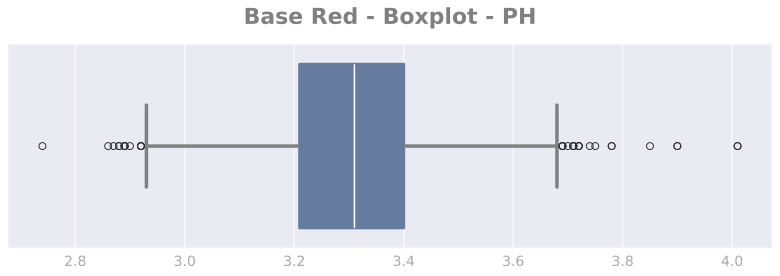

In [34]:
# 11 - Visualizando o boxplot da coluna PH na base red
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (11, 4))
ax = sns.boxplot(x = red["pH"], orient = "h",
                 linewidth = 3.5,
                 boxprops = dict(color = "#657c9e", linewidth = 3),
                 medianprops = dict(color = "white", linewidth = 1.5),
                 whiskerprops = dict(color = "grey"),
                 capprops = dict(color = "grey"))
ax.set_title("Base Red - Boxplot - PH", fontsize = 22, color = "grey", fontweight = "semibold", pad = 20)
ax.tick_params(axis = "x", labelsize = 14, colors = "darkgrey")
ax.set_xlabel("")
plt.tight_layout()

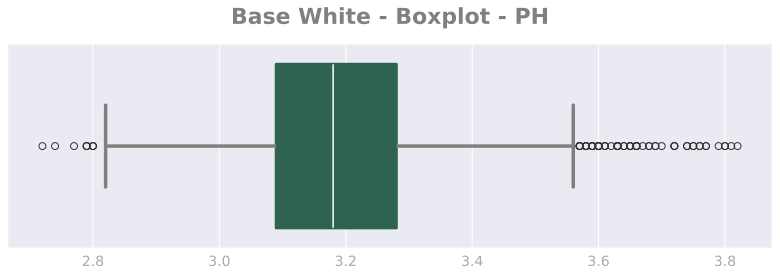

In [35]:
# 12 - Visualizando o boxplot da coluna PH na base white
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (11, 4))
ax = sns.boxplot(x = white["pH"], orient = "h",
                 linewidth = 3.5,
                 boxprops = dict(color = "#2d634f", linewidth = 3),
                 medianprops = dict(color = "white", linewidth = 1.5),
                 whiskerprops = dict(color = "grey"),
                 capprops = dict(color = "grey"))
ax.set_title("Base White - Boxplot - PH", fontsize = 22, color = "grey", fontweight = "semibold", pad = 20)
ax.tick_params(axis = "x", labelsize = 14, colors = "darkgrey")
ax.set_xlabel("")
plt.tight_layout()

#### De acordo com as definições sobre o **PH**, o vinho **branco** é mais **ácido e fresco**, já que o range de seus valores está aproximadamente entre **2.8 e 3.6**, com sua **mediana** próximo a **3.2**.

#### Já o vinho **tinto** possui range, mediana (3.3), e valores mais altos de **PH**.

### Machine Learning

#### Com estas informações podemos iniciar as preparações na base de dados para as configurações do **pycaret** para nossa **classificação**. Vamos separar nossa base em **treino e teste**, com **10%** dos dados para o **teste**, e em seguida, **20%** da base de **teste** para simular novos dados recebidos à partir do modelo em **produção**.

In [36]:
# 13 - Separando a base em treino e teste
base_treino = wine.sample(frac = 0.70, random_state = 42)
base_teste = wine.drop(base_treino.index).reset_index(drop = True)

base_novo_teste = base_teste.sample(frac = 0.20, random_state = 42)
base_teste = base_teste.drop(base_novo_teste.index).reset_index(drop = True)

base_treino.reset_index(drop = True, inplace = True)
base_novo_teste.reset_index(drop = True, inplace = True)

print(f"Tamanho base_treino: {base_treino.shape}")
print(f"Tamanho base_teste: {base_teste.shape}")
print(f"Tamanho base_novo_teste: {base_novo_teste.shape}")

Tamanho base_treino: (4548, 13)
Tamanho base_teste: (1559, 13)
Tamanho base_novo_teste: (390, 13)


#### No **pycaret** a função **setup** funciona como um **pipeline** onde é possível configurar os **tratamentos** da variável **alvo**, no nosso caso. Vamos criar um objeto para receber as **configurações padrão** da função.

In [37]:
# 14 - Criando um objeto para o setup passando a base de treino e a coluna alvo
classificador = setup(data = base_treino,
                      target = "wine_type")

,Description,Value
0,Session id,2731
1,Target,wine_type
2,Target type,Binary
3,Target mapping,"red: 0, white: 1"
4,Original data shape,"(4548, 13)"
5,Transformed data shape,"(4548, 13)"
6,Transformed train set shape,"(3183, 13)"
7,Transformed test set shape,"(1365, 13)"
8,Numeric features,12
9,Preprocess,True


In [38]:
# 15 - Mapeamento das classes
categories = base_treino["wine_type"].astype("category").cat.categories
print(f"Mapeamento das classes:\n0 = {categories[0]}\n1 = {categories[1]}")

Mapeamento das classes:
0 = red
1 = white


In [39]:
# # 15 - Outras opções para o pipeline de setup
# classificador = setup(data = base_treino,
#                       target = 'wine_type',
          #             normalize = True,
          #             transformation = True,
          #             remove_multicollinearity = True,
          #             multicollinearity_threshold = 0.95,
          #             fix_imbalance = True)  # Ativa balanceamento automático

#### A **comparação dos modelos de algoritmos** talvez seja o principal benefício ao utilizar o **pycaret**. Utilizaremos a função **compare models**, que realiza a comparação aplicando a **validação cruzada** e retorna as principais métricas de classificação:

- **Accuracy (Acurácia)** - Mede a proporção de previsões corretas em relação ao total de amostras. Útil quando as classes estão balanceadas.

- **AUC (Área sob a Curva ROC)** - Representa a capacidade do modelo de separar corretamente as classes. Quanto maior, melhor o desempenho do modelo em termos de separação entre positivo e negativo.

- **Recall (Sensibilidade ou Taxa de Verdadeiro Positivo)** - Mede a proporção de instâncias positivas corretamente identificadas pelo modelo. Importante para problemas onde falsos negativos são críticos.

- **Precision (Precisão)** - Mede a proporção de instâncias classificadas como positivas que realmente pertencem à classe positiva. Útil quando falsos positivos são problemáticos.

- **F1-Score** - Média harmônica entre precisão e recall. Equilibra os dois quando há um trade-off entre falsos positivos e falsos negativos.

- **Kappa** - Mede o grau de concordância entre as previsões do modelo e os valores reais, corrigindo pelo acaso. Quanto maior, melhor o modelo.

- **MCC (Matriz de Correlação de Matthews)** - Mede a qualidade das previsões considerando todas as categorias (TP, TN, FP, FN). É útil em problemas com classes desbalanceadas.

In [40]:
# 16 - Comparando modelos de classificação
melhor_modelo = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9953,0.9987,0.9953,0.9953,0.9953,0.9874,0.9875,0.1820
lightgbm,Light Gradient Boosting Machine,0.9950,0.9984,0.9950,0.9950,0.9950,0.9866,0.9866,1.1770
xgboost,Extreme Gradient Boosting,0.9943,0.9992,0.9943,0.9944,0.9943,0.9849,0.9850,0.0750
rf,Random Forest Classifier,0.9940,0.9989,0.9940,0.9941,0.9940,0.9841,0.9841,0.4950
lda,Linear Discriminant Analysis,0.9937,0.9953,0.9937,0.9937,0.9937,0.9832,0.9833,0.0300
gbc,Gradient Boosting Classifier,0.9928,0.9989,0.9928,0.9928,0.9928,0.9807,0.9808,0.3790
ada,Ada Boost Classifier,0.9912,0.9981,0.9912,0.9913,0.9912,0.9766,0.9767,0.1490
ridge,Ridge Classifier,0.9865,0.9930,0.9865,0.9866,0.9864,0.9638,0.9640,0.0620
lr,Logistic Regression,0.9843,0.9933,0.9843,0.9844,0.9842,0.9578,0.9581,1.3460
qda,Quadratic Discriminant Analysis,0.9837,0.9938,0.9837,0.9843,0.9838,0.9572,0.9577,0.0500


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

#### Para melhor visualização vamos utilizar a função **pull** que retorna um **dataframe** com os algoritmos ordenados, para que consigamos obter o nome do **modelo** que desejamos utilizar. Para fazer sentido técnico em nosso tratamento de **tuning**, iremos escolher não o **melhor modelo**, mas sim, o **pior modelo dentre todos** para que verifiquemos seu resultado final.

In [41]:
# 17 - Criando um dataframe e obtendo o nome do modelo escolhido com a métrica MCC acima de 0.80
df_melhor_modelo = pull()
df_melhor_modelo = df_melhor_modelo[df_melhor_modelo["MCC"] > 0.80]
df_melhor_modelo = df_melhor_modelo.sort_values(by = ["MCC"])
df_melhor_modelo.head(1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.9299,0.98,0.9299,0.9371,0.9297,0.8141,0.8232,0.084


#### Ao observarmos o modelo escolhido pela métrica **MCC**, seu valor inicial foi de **0.8096**. Este será o ponto de partida para comparação do resultado final.

In [42]:
# 18 - Obtendo o nome do modelo escolhido
modelo_escolhido = df_melhor_modelo.head(1)
string_modelo_escolhido = modelo_escolhido.Model.index[0]
string_modelo_escolhido

'svm'

#### Uma vez que já escolhemos o **modelo**, podemos de fato **criá-lo** com a função **create model**. Iniciaremos observando as **métricas** para este modelo.

In [43]:
# 19 - Criando o modelo escolhido de classificação para esta base de dados
modelo = create_model(string_modelo_escolhido)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9530,0.9781,0.9530,0.9538,0.9518,0.8689,0.8729
1,0.9530,0.9890,0.9530,0.9528,0.9522,0.8711,0.8727
2,0.8934,0.9754,0.8934,0.9174,0.8980,0.7459,0.7628
3,0.9057,0.9824,0.9057,0.9162,0.8974,0.7106,0.7423
4,0.9465,0.9928,0.9465,0.9464,0.9454,0.8512,0.8538
5,0.9654,0.9879,0.9654,0.9656,0.9649,0.9045,0.9062
6,0.9025,0.9755,0.9025,0.9201,0.9062,0.7637,0.7757
7,0.9025,0.9773,0.9025,0.9224,0.9064,0.7655,0.7795
8,0.9497,0.9747,0.9497,0.9493,0.9490,0.8630,0.8641


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

#### Podemos visualizar o relatório de classificação com a função **plot_model**.

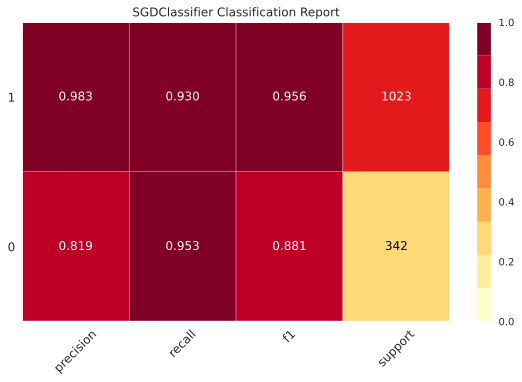

In [44]:
# 20 - Visualizando o relatório de classificação* (por algum erro interno, o nome do gráfico aparece como SGD)
plot_model(modelo, plot = "class_report")

#### Uma vez que já definimos nosso modelo, podemos realizar o **tuning** com a função **tune_model**. Passamos a métrica escolhida, no caso, **MCC**, e criamos uma variável para receber o resultado.

In [45]:
# 21 - Realizando o tunning dos hiperparâmetros com a métrica "MCC"
modelo_tuned = tune_model(modelo, optimize = "MCC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9467,0.9700,0.9467,0.9465,0.9466,0.8576,0.8576
1,0.9530,0.9822,0.9530,0.9528,0.9529,0.8743,0.8744
2,0.9216,0.9595,0.9216,0.9204,0.9204,0.7852,0.7866
3,0.9308,0.9614,0.9308,0.9298,0.9299,0.8099,0.8110
4,0.9403,0.9843,0.9403,0.9397,0.9399,0.8379,0.8382
5,0.9591,0.9804,0.9591,0.9591,0.9585,0.8872,0.8888
6,0.9497,0.9626,0.9497,0.9493,0.9490,0.8630,0.8641
7,0.9214,0.9566,0.9214,0.9225,0.9219,0.7938,0.7940
8,0.9465,0.9642,0.9465,0.9474,0.9469,0.8598,0.8600


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


#### Nossa métrica evoluiu de **0.8096** para **0.9023**. Portanto, o **tuning** efetivamente trouxe um resultado interessante para a base de **treino**. Vamos visualizar mais detalhadamente a **matriz de confusão**, as **features** mais importantes, e a própria **construção do modelo**.

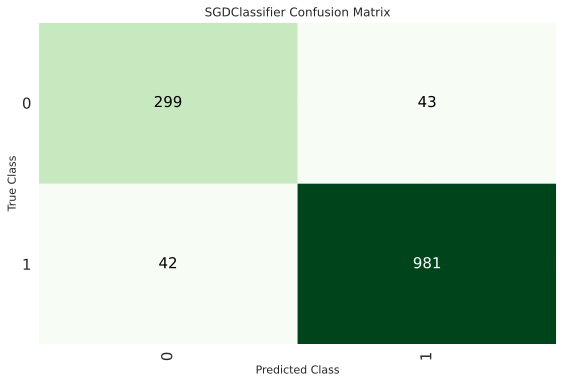

In [46]:
# 22 - Visualizando a matriz de confusão do modelo tuned
plot_model(modelo_tuned, plot = "confusion_matrix")

#### Na matriz acima, podemos observar ocorrendo o **erro do tipo 1** em **25 casos**, quando o vinho era **tinto** e o **modelo** disse que era **branco**, ou seja, nitidamente aquele famoso **alarme falso** quando o **valor real é negativo** mas o **modelo classifica como positivo**.

#### Já ao contrário, o **modelo errou** em **31 ocasiões** quando o vinho era **branco** e foi classificado como **tinto**.

#### Também podemos verificar quais **colunas** são efetivamente **importantes** para o modelo com o parâmetro **feature**. Bem como visualizar o **fluxo** de construção que o **pycaret** aplica.

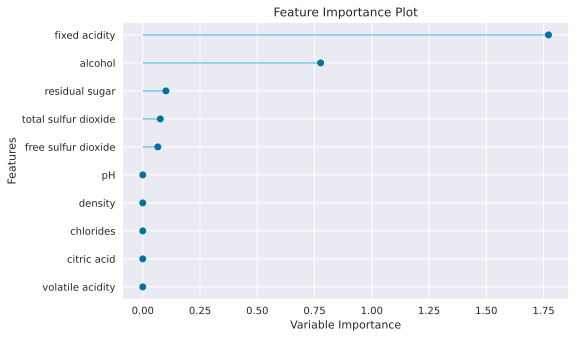

In [47]:
# 23 - Verificando as colunas mais importantes
plot_model(modelo_tuned, plot = "feature")

#### Conseguimos identificar acima que plotamos na fase de **análise exploratória (EDA)** **duas** das **5** features mais importantes: **PH** e **Alcohol**. Abaixo, a função **evaluate_model** nos mostra o fluxo de construção do modelo.

In [48]:
# 24 - Verificando a avaliação do modelo
evaluate_model(modelo_tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#### Uma vez que temos nosso modelo **tunado**, vamos utilizar a função **predict_model** para efetivamente realizar a **previsão** deste modelo.

In [49]:
# 25 - Realizando as previsões do modelo
predict_model(modelo_tuned);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.9377,0,0.9377,0.9377,0.9377,0.8340,0.8340


#### Observando ainda a métrica **MCC**, obtivemos **0.8915** de acertos qualitativos em nossa previsão. Lembrando que partirmos de **0.8096**. Podemos finalmente criar nosso **modelo final** para utilização em **produção**.

In [50]:
# 26 - Criação do modelo final com um fit geral na base de dados
modelo_final = finalize_model(modelo_tuned)
modelo_final

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates...
                 SGDClassifier(alpha=0.02, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.01,
                               fit_intercept=False, l1_ratio=0.8700000001,
                               learning_rate='adaptive', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=-1,
                               penalty='elasticnet', power_t=0.5,
                               random_state=2731, shuffle=True, tol=0.001,
                               validation_fraction=0.1, verbose=0,
                               warm_start=False))],
         verbose=False)

#### Após o treinamento, podemos realizar as **previsões** do modelo treinado na base de **teste**, que ainda não foi acessada, justamente para evitar o **data leakage**, ou seja, o **vazamento** dos dados.

In [51]:
# 27 - Previsão na base de teste, ou seja, em dados não vistos
previsoes_sobre_teste = predict_model(modelo_final, data = base_teste)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.9352,0,0.9352,0.9349,0.9351,0.8181,0.8182


#### Obtivemos até o momento o resultado de **0.9170** para nossa métrica **MCC**, extremamente interessante. Os passos seguintes, opcionais, serão:
- **salvar** o modelo treinado;
- **carregar** o modelo treinado para uma nova utilização;
- **realizar novas previsões** à partir do modelo carregado.

In [52]:
# 28 - Salvando o modelo com a função save_model
save_model(modelo_final, "Modelo_para_Producao")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  SGDClassifier(alpha=0.02, average=False, class_weight=None,
                                early_stopping=False, epsilon=0.1, eta0=0.01,
                                fit_intercept=False, l1_ratio=0.8700000001,
           

In [53]:
# 29 - Carregando o modelo salvo com a função load_model
modelo_producao_salvo = load_model("Modelo_para_Producao")

Transformation Pipeline and Model Successfully Loaded


In [54]:
# 30 - Realizando novas previsões com o modelo salvo e a função predict_model
novas_previsoes = predict_model(modelo_producao_salvo, data = base_novo_teste)
novas_previsoes.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.9385,0,0.9385,0.9378,0.9380,0.8318,0.8322


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,prediction_label
0,7.8,0.190,0.32,7.4,0.015,47.0,124.0,0.99278,2.99,0.39,11.0,6,white,white
1,7.7,0.260,0.51,2.6,0.045,26.0,159.0,0.99126,3.00,0.50,11.2,6,white,white
2,6.4,0.350,0.20,5.7,0.034,18.0,117.0,0.99440,3.33,0.43,10.1,5,white,white
3,8.3,0.230,0.30,2.1,0.049,21.0,153.0,0.99530,3.09,0.50,9.6,6,white,white
4,7.7,1.005,0.15,2.1,0.102,11.0,32.0,0.99604,3.23,0.48,10.0,5,red,red


### Concluindo:

#### **Classificar dados corretamente** é um dos principais **benefícios** que o **machine learning** pode oferecer no complexo mundo real em que vivemos. Claro, diversas frentes possuem suas complexidades inerentes às suas realidades. Contudo, classificar um **tipo de vinho** corretamente, mediante a matemática envolvida em seus parâmetros internos disponíveis para análise, é sem dúvida nenhuma um **grande sucesso**. No nosso case, acertamos com qualidade cerca de **96%** das previsões ao simularmos **dados em produção**, onde nossa métrica **MCC** retornou o valor de **0.9585**. Se lembrarmos que partirmos de **0.9096**, é sem dúvida um resultado fantástico.

#### - Aos moldes do **scikit-learn**, o **pycaret** consegue com poucas linhas de código e poucas funções realizar as **previsões** para seus modelos de machine learning. O grande trunfo da biblioteca é de fato poder **comparar** diversos algoritmos com suas **configurações padrão** apontando de forma extremamente ágil o **melhor modelo**, ainda que no nosso caso, fizemos questão de escolher o **pior** deles **acima de 80%** de acertos. Tal questão foi especificamente para verificar o quanto um modelo pode **melhorar** com seus tratamentos de **hiperparâmetros**, ou seja, o modelo **tunado**.

#### - Vale o experimento tanto com outras **métricas** quanto com outros **algoritmos**, independente da escolha pelo **pycaret** da melhor opção, bem como a utilização de outro **dataset**, para se obter mais familiaridade com esta biblioteca.

#### Obs.: Ao escolher o algoritmo **svm**, internamente nos gráficos o pycaret escreveu **sgd**. Infelizmente é um ponto negativo na biblioteca, pois as configurações de seus gráficos são extremamente **engessadas** no sentido mais literal da palavra. Realmente uma pena, pois é nítido durante o **EDA** o **bom resultado gráfico** obtido com **matplotlib e seaborn**. Poderia ser uma solução mais amigável neste sentido. Fica aqui o registro.

#### Muito obrigado pela leitura. Caso tenha interesse em analisar outros projetos fique à vontade acessando diretamente meu [GitHub](https://github.com/wallacecarlis), [Medium](https://wallacecarlis.medium.com/), e meu [Site](https://www.wallacecarlis.com/). Todo feedback será bem-vindo, abs!